<a href="https://colab.research.google.com/github/Alexandro23/Simulaci-n-2/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```Alumno: Alejaldre Granados Marlon Alexandro  |   8MM1```
## SIMULACION II

---
# PROYECTO ARIMA - METODOLOGÍA BOX-JENKIGNS
---


El método Box-Jenkins es un enfoque estadístico utilizado para analizar y predecir series de tiempo. Fue desarrollado por George Box y Gwilym Jenkins en la década de 1970.

Box y Jenkins han desarrollado modelos estadísticos para series temporales que tienen en cuenta la dependencia existente entre los datos, esto es, cada observación en un momento dado es modelada en función de los valores anteriores. Los análisis se basan en un modelo explícito. Los modelos se conocen
con el nombre genérico de **ARIMA** ```(AutoRegresive Integrated Moving Average)```, que deriva de sus tres componentes ```AR (Autoregresivo), I(Integrado) y MA (Medias Móviles).```

El modelo **ARIMA** permite describir un valor como una función lineal de datos anteriores y errores debidos al azar, además, puede incluir un componente cíclico o estacional. Es decir, debe contener todos los elementos necesarios para describir el fenómeno. Box y Jenkins recomiendan como mínimo 50 observaciones en la serie temporal.

El método Box-Jenkins se utiliza para modelar y predecir patrones en series de tiempo, que son conjuntos de datos ordenados cronológicamente. El enfoque se basa en tres etapas principales: identificación, estimación y diagnóstico.

* Identificación: En esta etapa, se analizan los datos de la serie de tiempo para determinar su estacionariedad y si existe alguna tendencia o estacionalidad presente. Se utilizan gráficos de autocorrelación y autocorrelación parcial para identificar los componentes autoregresivos (AR) y de promedio móvil (MA) del modelo.

* Estimación: Una vez que se han identificado los componentes AR y MA del modelo, se estima el orden y los parámetros del modelo. Se utilizan métodos de estimación como el método de mínimos cuadrados, el método de máxima verosimilitud o el método de mínimos cuadrados generalizados.

* Diagnóstico: En esta etapa, se evalúa la calidad del modelo estimado. Se examinan los residuos del modelo para verificar si cumplen con los supuestos de ruido blanco, es decir, si no hay patrones sistemáticos remanentes en los residuos.

Una vez que se ha seleccionado y estimado el modelo adecuado, se puede utilizar para realizar predicciones futuras de la serie de tiempo.

La principal diferencia entre el método ARIMA y el método Box-Jenkins radica en el enfoque de modelado. Mientras que el método Box-Jenkins abarca todo el proceso de identificación, estimación y diagnóstico del modelo, ARIMA se centra específicamente en la modelización y predicción de las series de tiempo utilizando componentes autoregresivos (AR), de promedio móvil (MA) y la diferenciación de la serie de tiempo.



----
## Simulacion para aproximar precio de acciones de Apple usando el Modelo ARIMA
----

Importamos las librerías necesarias:

* ```pandas``` para el análisis de datos.
* ```numpy``` para operaciones numéricas.
* ```statsmodels``` para el modelado estadístico con ARIMA.
* ```yfinance``` para obtener datos financieros de Yahoo Finance.
* ```matplotlib.pyplot``` para graficar.

In [1]:
import pandas as pd #pandas es una librería muy utilizada para el análisis de datos en Python.
import numpy as np
from statsmodels.tsa.arima.model import ARIMA #statsmodels es una librería que proporciona herramientas para el modelado estadístico, incluyendo el modelo ARIMA.
from statsmodels.tsa.arima.model import ARIMAResults
import yfinance as yf #yfinance es una librería que permite acceder a los datos financieros de Yahoo Finance.
import matplotlib.pyplot as plt


* Definimos el símbolo de la acción que deseamos analizar, así como las fechas de inicio y fin deseadas.

* Utilizamos la función yf.download() de yfinance para obtener los datos históricos de precios de cierre ajustados de la acción especificada dentro del rango de fechas proporcionado. Almacenamos estos datos en el DataFrame data.

* Extraemos los precios de cierre ajustados de data y los asignamos a la variable prices.

In [2]:
ticker = "AAPL"  # Símbolo de la acción de Apple
start_date = "2023-04-01"  # Fecha de inicio deseada
end_date = "2023-06-30"  # Fecha de fin deseada
data = yf.download(ticker, start=start_date, end=end_date)

prices = data["Close"]  # Utiliza los precios de cierre ajustados

[*********************100%***********************]  1 of 1 completed


* Definimos los rangos de valores posibles para los órdenes p, d y q del modelo ARIMA que vamos a ajustar. En este caso, p_range va de 0 a 2, d_range va de 0 a 1 y q_range va de 0 a 2.

* Inicializamos variables para almacenar el valor óptimo del criterio de información de Akaike (AIC) y el orden óptimo (best_order) del modelo ARIMA.

* Búsqueda en cuadrícula (Grid Search) para encontrar los valores óptimos de **p**, **q** y **d**, utilizando las variables p_range, d_range y q_range, respectivamente. Utilizamos bucles for anidados para iterar sobre todas las combinaciones posibles de p, d y q. Dentro del bucle, se crea un objeto de modelo ARIMA con los órdenes actuales y se intenta ajustar el modelo a los datos. Si el ajuste es exitoso y el AIC obtenido es menor que el mejor AIC anterior, se actualiza el mejor AIC y se guarda el orden actual como el mejor orden.

* Imprimimos los valores óptimos de p, d y q obtenidos.

In [4]:
#===========================Elegimos valores para p, d y q=======================================================================#

# Definir los rangos de valores para p, d y q
p_range = range(0, 3)  # Rango para p: 0, 1, 2, 3
d_range = range(0, 2)  # Rango para d: 0, 1, 2
q_range = range(0, 3)  # Rango para q: 0, 1, 2, 3

best_aic = float("inf")
best_order = None

# Iterar sobre las combinaciones de valores de p, d y q
# p = Orden del componente autoregresivo (AR)
# d = Orden de diferenciación (I)
# q = Orden del componente de promedio móvil (MA)

for p in p_range:
    for d in d_range:
        for q in q_range:
            order = (p, d, q)
            # se crea un objeto de modelo ARIMA con los órdenes deseados
            model = ARIMA(prices, order=order)
            '''
            Donde p, d y q son los órdenes del componente autoregresivo (AR), de diferenciación (I) y de promedio móvil (MA) respectivamente.
            Estos valores deben ajustarse según el análisis de los datos.
            '''
            try:
                # Se ajusta el modelo ARIMA a los datos:
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = order
            except:
                continue

# Imprimir los valores óptimos de p, d y q
print("Valores óptimos de p, d y q:", best_order)

#==============================================================================================#

* Definimos el número de pasos hacia adelante que deseamos pronosticar (n).

* Realizamos el pronóstico utilizando el modelo ajustado con el método forecast() de model_fit. Almacenamos los valores pronosticados en la variable forecast.

* Obtenemos los errores de pronóstico y la desviación estándar utilizando el método summary_frame() de get_forecast(). Guardamos la desviación estándar en la variable forecast_error_std.

* Calculamos los límites inferior y superior del intervalo de confianza utilizando los valores pronosticados y la desviación estándar.

* Graficamos la serie de tiempo original utilizando la función plot() de matplotlib.pyplot.

* Graficamos el pronóstico y los intervalos de confianza utilizando la función plot() nuevamente. Utilizamos la función fill_between() para crear una región sombreada entre los límites inferior y superior.

* Configuramos las leyendas, etiquetas de los ejes y título del gráfico.

* Mostramos el gráfico utilizando la función show() de matplotlib.pyplot.

Valores óptimos de p, d y q: (0, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


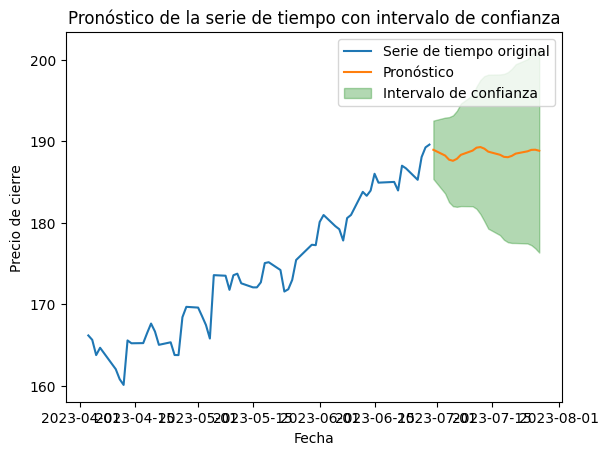

In [6]:
print("Valores óptimos de p, d y q:", best_order)
# Donde n representa el número de pasos hacia adelante para los cuales se desea hacer el pronóstico.
n = 20

#Se pueden realizar pronósticos utilizando el modelo ajustado
forecast = model_fit.forecast(steps=n)  # Realiza un pronóstico de n pasos hacia adelante


# Obtener los errores de pronóstico y la desviación estándar
forecast_error = model_fit.get_forecast(steps=n).summary_frame(alpha=0.01)
forecast_error_std = forecast_error['mean_se']

# Calcular los intervalos de confianza
lower_bound = forecast - 1.96 * forecast_error_std
upper_bound = forecast + 1.96 * forecast_error_std

# Graficar serie de tiempo original
plt.plot(prices, label='Serie de tiempo original')


# Graficar pronóstico y los intervalos de confianza
forecast_index = pd.date_range(start=prices.index[-1], periods=n+1, freq='B')[1:]  # Índice para el pronóstico
plt.plot(forecast_index, forecast, label='Pronóstico')
plt.fill_between(forecast_index, lower_bound, upper_bound, color='green', alpha=0.3, label='Intervalo de confianza')

# Configurar leyenda y etiquetas
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Pronóstico de la serie de tiempo con intervalo de confianza')

# Mostrar gráfico
plt.show()


---
## Impresion de datos del pronóstico.
---

* Importamos la función tabulate de la librería tabulate.

* Suponemos que tienes los datos de pronóstico en una lista llamada forecast y los límites inferior y superior en las listas lower_bound y upper_bound.

* Combinamos los datos de pronóstico con los límites inferior y superior en una lista de listas utilizando la función zip(). Esto crea una lista donde cada elemento contiene el pronóstico, el límite inferior y el límite superior correspondiente.

* Definimos los encabezados de las columnas de la tabla en una lista llamada headers. Estos encabezados se mostrarán en la primera fila de la tabla.

* Utilizamos la función tabulate para imprimir la tabla con formato. Pasamos la lista de listas de datos (data), los encabezados de las columnas (headers) y especificamos el formato de la tabla como "pipe". El formato "pipe" muestra la tabla utilizando caracteres de tubería (|) para delimitar las columnas.

* Finalmente, se imprime la tabla en pantalla.

In [7]:
from tabulate import tabulate

# Supongamos que tienes tus datos de pronóstico en una lista llamada 'forecast'
# Y tienes los límites superiores e inferiores en las listas 'upper_bound' y 'lower_bound'

# Combinar los datos de pronóstico con los límites en una lista de listas
data = list(zip(forecast, lower_bound, upper_bound))

# Definir los encabezados de las columnas
headers = ["Pronóstico", "Límite inferior", "Límite superior"]

# Imprimir la tabla con formato
print(tabulate(data, headers, tablefmt="pipe"))


|   Pronóstico |   Límite inferior |   Límite superior |
|-------------:|------------------:|------------------:|
|      188.953 |           185.371 |           192.535 |
|      188.246 |           183.591 |           192.9   |
|      187.741 |           182.525 |           192.956 |
|      187.604 |           182.032 |           193.175 |
|      187.845 |           181.953 |           193.736 |
|      188.33  |           182.044 |           194.617 |
|      188.852 |           182.028 |           195.676 |
|      189.21  |           181.713 |           196.708 |
|      189.29  |           181.066 |           197.514 |
|      189.093 |           180.195 |           197.99  |
|      188.723 |           179.276 |           198.171 |
|      188.34  |           178.478 |           198.201 |
|      188.086 |           177.914 |           198.259 |
|      188.044 |           177.613 |           198.474 |
|      188.203 |           177.52  |           198.887 |
|      188.483 |           177.

---
## Gráfica del Pronóstico
---

* En una lista llamada forecast, y los límites inferior y superior en las listas lower_bound y upper_bound.

* Definimos el rango de índices utilizando la función arange() de numpy. La longitud del rango de índices será igual a la longitud de los datos de pronóstico (len(forecast)). Esto crea un arreglo de números enteros consecutivos que se utilizarán como índices para los datos y las líneas en la gráfica.

* Graficamos los datos de pronóstico como puntos utilizando la función scatter() de matplotlib.pyplot. Pasamos el arreglo de índices (index) como la coordenada x y la lista de pronósticos (forecast) como la coordenada y. También agregamos una etiqueta (label) para la leyenda de la gráfica.

* Graficamos los límites inferior y superior como líneas utilizando la función plot() de matplotlib.pyplot. Pasamos el arreglo de índices (index) como la coordenada x y las listas de límites inferior y superior (lower_bound y upper_bound) como las coordenadas y respectivas. Configuramos el color de la línea inferior como rojo (color='red') y el color de la línea superior como verde (color='green'). También configuramos el estilo de línea como discontinua (linestyle='--'). Agregamos etiquetas para la leyenda de la gráfica.

* Configuramos las leyendas y etiquetas de los ejes utilizando las funciones legend(), xlabel(), ylabel() y title() de matplotlib.pyplot.

* Ajustamos la posición de las etiquetas del eje x utilizando la función xticks() de matplotlib.pyplot. Pasamos el arreglo de índices (index) como los valores a etiquetar y nuevamente el arreglo de índices (index) como las etiquetas en sí. Esto asegura que se muestren las etiquetas en cada punto de datos.

* Mostramos la gráfica utilizando la función show() de matplotlib.pyplot.

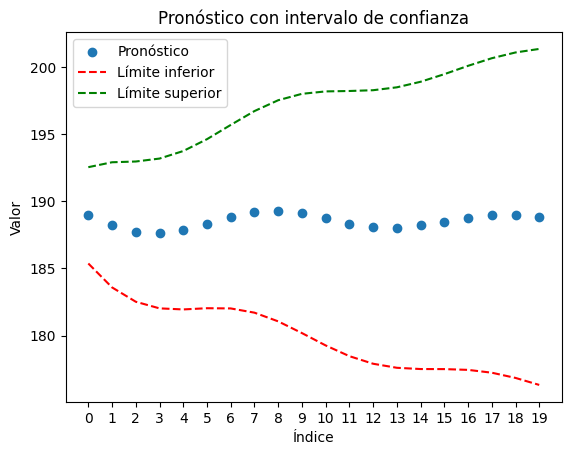

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes tus datos de pronóstico en una lista llamada 'forecast'
# Y tienes los límites superiores e inferiores en las listas 'upper_bound' y 'lower_bound'

# Definir el rango de índices para los datos
index = np.arange(len(forecast))

# Graficar los datos de pronóstico como puntos
plt.scatter(index, forecast, label='Pronóstico')

# Graficar los límites inferior y superior como líneas
plt.plot(index, lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.plot(index, upper_bound, color='green', linestyle='--', label='Límite superior')

# Configurar leyendas y etiquetas
plt.legend()
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Pronóstico con intervalo de confianza')

# Ajustar la posición de las etiquetas del eje x
plt.xticks(index, index)

# Mostrar gráfico
plt.show()
